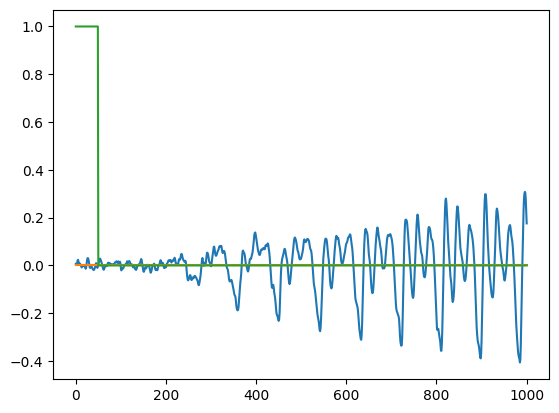

500
1
Initializing...
Training network...
Batch 1 of 10, 50 trials: 
..................................................
Batch 2 of 10, 50 trials: 
..................................................
Batch 3 of 10, 50 trials: 
..................................................
Batch 4 of 10, 50 trials: 
..................................................
Batch 5 of 10, 50 trials: 
..................................................
Batch 6 of 10, 50 trials: 
..................................................
Batch 7 of 10, 50 trials: 
..................................................
Batch 8 of 10, 50 trials: 
..................................................
Batch 9 of 10, 50 trials: 
..................................................
Batch 10 of 10, 50 trials: 
..................................................
Done training!
Initializing...
Testing: 10 trials
..........
E_norm.shape (1, 1)
Normalized error: 0.308073


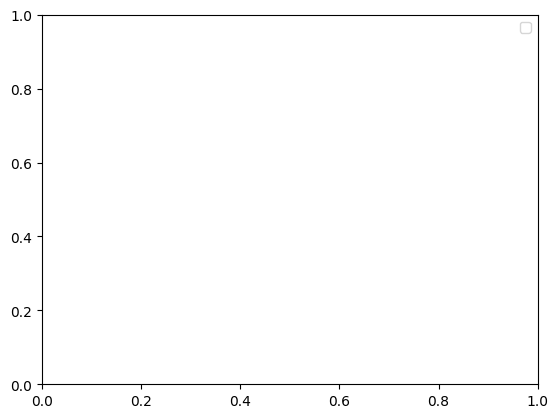

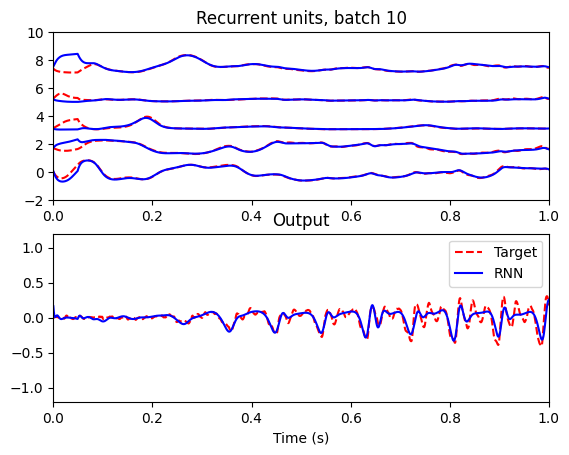

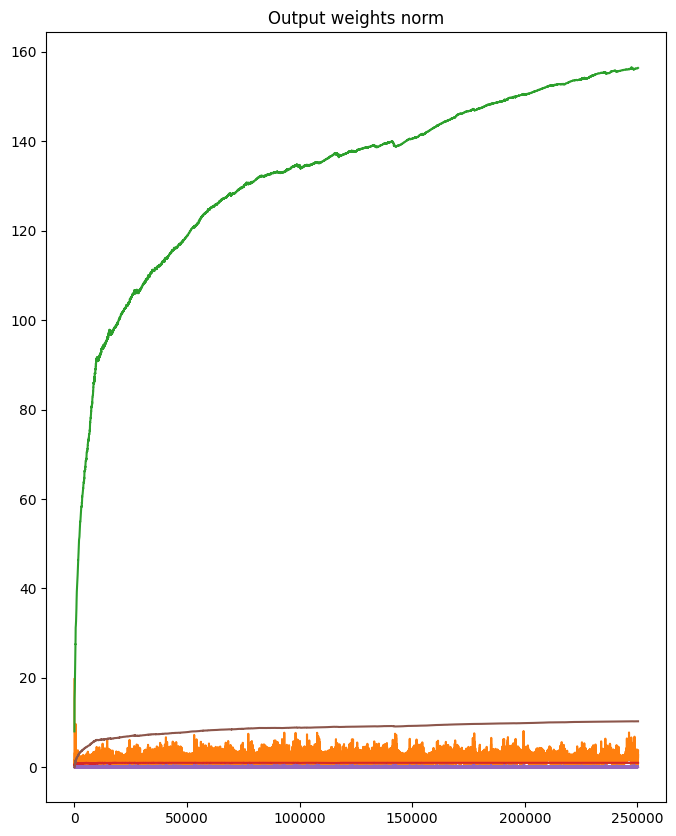

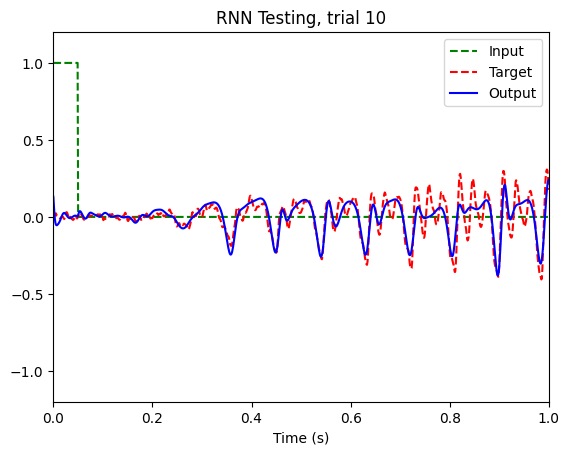

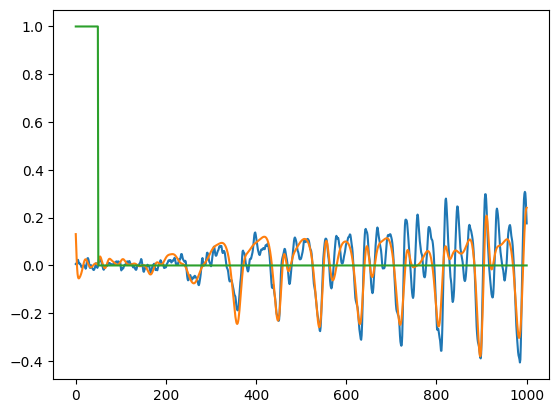

enorm0 0.3080731695722627


IndexError: ignored

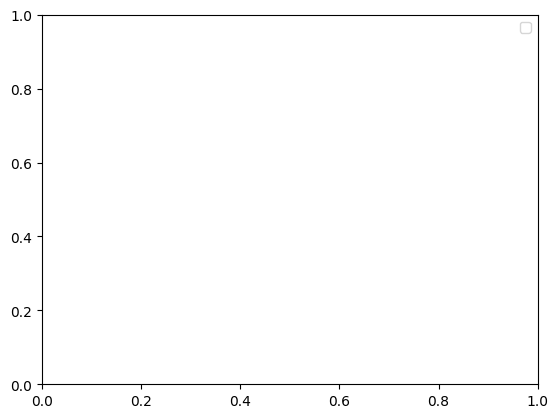

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 31 16:54:35 2023

@author: ANKITA PAUL
"""

import numpy as np
import matplotlib.pyplot as plt
import time
dt = 0.001
dt_per_s = round(1/dt)
import numpy as np

import pandas as pd

def orig_system_test(dt, showplots=0):
    dt_per_s = round(1/dt)

    # From the paper, and the online demo:
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.zeros((2*dt_per_s+1,1))
    omega = np.linspace(2*np.pi, 6*np.pi, 1*dt_per_s+1)
    #targ = np.zeros((2*dt_per_s+1,1))
    #targ[0:(1*dt_per_s+1),0] = np.sin(t[0:(1*dt_per_s+1),0]*omega)
    #targ[1*dt_per_s:(2*dt_per_s+1)] = -np.flipud(targ[0:(1*dt_per_s+1)])
    #print('sine target shape',targ.shape)

    # omega = np.ones((2*dt_per_s,1)) * 4 *np.pi
    # targ = np.sin(t*2*omega) * np.sin(t*omega/4)



    sample = pd.read_csv('y.csv')

    rawvalues1 = sample['speech'].values




    rawvalues1 = rawvalues1[3244:4245]
    rawvalues2 = rawvalues1[2244:3245]
    rawvalues3 = rawvalues1[3244:4245]

    #target signal
    targ1 = np.zeros((1001, 1))
    targ2 = np.zeros((1001, 1))
    targ3 = np.zeros((1001, 1))


    #target signal
    #targ = np.zeros((6001, 1))



    for d in range(len(targ1)):
        targ1[d][0] = rawvalues1[d]

    #for d in range(len(targ2)):
    #    targ2[d][0] = rawvalues2[d]

    #for d in range(len(targ3)):
    #    targ3[d][0] = rawvalues1[d]






    inp = np.zeros(targ1.shape)
    inp[0:round(0.05*dt_per_s),0] = np.ones((round(0.05*dt_per_s)))

    hints = np.zeros(targ1.shape)
    #print('hints',hints)
    if showplots == 1:
        plt.figure()
        plt.plot(targ1)
        plt.plot(hints)
        plt.plot(inp)
        plt.show()
        plt.legend(['Target','Hints','Input'])

    return inp, targ1,  hints




def system_change_test(dt, showplots=0):
    dt_per_s = round(1/dt)

    # From the paper, and the online demo:
    t = np.expand_dims(np.linspace(0,2,2*dt_per_s+1),1)
    omega = np.zeros((2*dt_per_s+1,1))
    omega = np.linspace(2*np.pi, 6*np.pi, 1*dt_per_s+1)
    targ = np.zeros((2*dt_per_s+1,1))
    targ[0:(1*dt_per_s+1),0] = np.sin(t[0:(1*dt_per_s+1),0]*omega)
    targ[1*dt_per_s:(2*dt_per_s+1)] = -np.flipud(targ[0:(1*dt_per_s+1)])
    #print('sine target shape',targ.shape)

    # omega = np.ones((2*dt_per_s,1)) * 4 *np.pi
    # targ = np.sin(t*2*omega) * np.sin(t*omega/4)



    #for i in range(len(targ)):
	   #   targ[i][0] = np.arcsin(np.sin(2*np.pi*i*dt*10))

    sample = pd.read_csv('y.csv')

    rawvalues1 = sample['speech'].values




    rawvalues1 = rawvalues1[7244:10245]


    #target signal
    targ = np.zeros((3001, 1))


    #target signal
    targ = np.zeros((3001, 1))



    for d in range(len(targ)):
        targ[d][0] = rawvalues1[d]






    inp = np.zeros(targ.shape)
    inp[0:round(0.05*dt_per_s),0] = np.ones((round(0.05*dt_per_s)))

    hints = np.zeros(targ.shape)
    #print('hints',hints)
    if showplots == 1:
        plt.figure()
        plt.plot(targ)
        plt.plot(hints)
        plt.plot(inp)
        plt.show()
        plt.legend(['Target','Hints','Input'])

    return inp, targ, hints







orig_system_test(dt=0.001,showplots=1)
import FF_Demo



#rnn1.train(fullforce_oscillation_test, monitor_training=1)

def YYO(n1,n2):
  errors=[]
  outputs = []
  targs = []
  for i in range (n1,n2):
     print(i)

     for j in range (1,10):
       print(j)
       alpha = j/10.0
       p = FF_Demo.create_parameters(network_size=i,dt=0.001,ff_alpha=alpha)
       p['g'] = 1.5 # From paper
       p['ff_num_batches'] = 10
       p['ff_trials_per_batch'] = 50
       p['test_init_trials']=3
       p['network size']=i
       p['ff_alpha']=alpha
       rnn1 = FF_Demo.RNN(p,1,1)
       rnn1.train(orig_system_test, monitor_training=1)
       enorm0,output0,target0= rnn1.test(orig_system_test)
       #outputs.append(output0)
       print('enorm0',enorm0)
       np.savetxt('outputsrv2'+str(i)+str(j)+'.csv',output0)
       np.savetxt('targsrv2'+str(i)+str(j)+'.csv',target0)
       with open(os.path.join("model", "rnnrv2"+str(i)+str(j)+".pkl"), "wb") as file:
          pickle.dump(rnn1, file)
       if enorm0[0]<0.3:
          with open(os.path.join("model", "rnn"+str(i)+str(j)+".pkl"), "wb") as file:
             pickle.dump(rnn1, file)
          #return rnn1
       else:
         j+=1

  print('enorm0',enorm0)
  errors.append(enorm0[0])
  np.savetxt('errors.csv',errors)
  return errors,rnn1,enorm0,output0


errors, rnn2, enorm0,output0 = YYO(500, 510)

import pickle
import os
#with open(os.path.join("model", "sumofsines.pkl"), "wb") as file:
 #    pickle.dump(rnn1, file)
#With line_profiler:
# %lprun -f rnn.train rnn.train(fullforce_oscillation_test, monitor_training=1)

system_change_test(dt=0.001,showplots=1);
with open(os.path.join("model", "speech.pkl"), "rb") as file:
     rnn1 = pickle.load(file)



#enorm1= rnn1.test(system_change_test)
#print('enorm1',enorm1)
#if enorm1[0] >0.8:
 #  errors, rnn2, enorm0,output0 = YYO(800, 900)
#enorm2 = rnn2.test(system_change_test)
#print('enorm2',enorm2)
#if enorm2>0.3:


#    enorm3= rnn2.test(fullforce_oscillation_test2);
# print('enorm3',enorm3)
# if enorm3>0.3:


#    enorm4= rnn3.test(fullforce_oscillation_test2);
# print('enorm4',enorm4)

# if enorm3 and enorm4 >0.4:
#     rnn2.train(fullforce_oscillation_test, monitor_training=1)
#     enorm5= rnn2.test(fullforce_oscillation_test2)
#     rnn3.train(fullforce_oscillation_test, monitor_training=1)
#     enorm6= rnn3.test(fullforce_oscillation_test2)
#     print('enorm5',enorm5)
#     print('enorm6',enorm6)
# enorm1= rnn1.test(fullforce_oscillation_test);
# print('enorm1',enorm1)

# if enorm1>0.3:
#     rnn2.train(fullforce_oscillation_test, monitor_training=1)

# enorm2= rnn2.test(fullforce_oscillation_test);
# print('enorm2',enorm2)

# if enorm1>0.3:
#     rnn3.train(fullforce_oscillation_test, monitor_training=1)



# enorm3= rnn3.test(fullforce_oscillation_test);
# print('enorm3',enorm3)

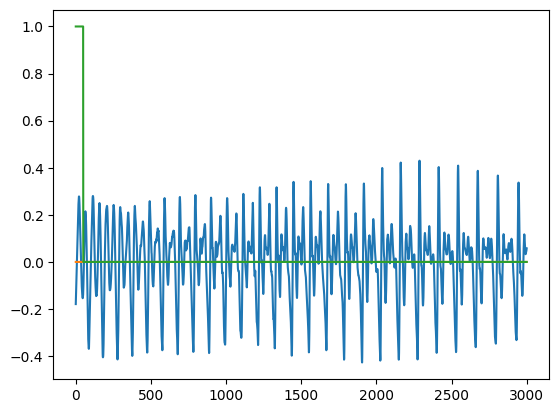

Initializing...
Testing: 10 trials
..........
E_norm.shape (1, 1)
Normalized error: 3.85511


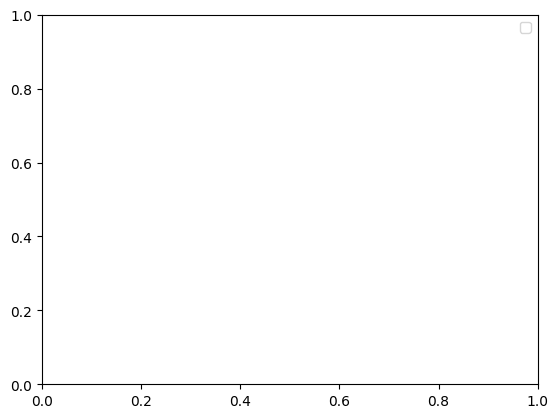

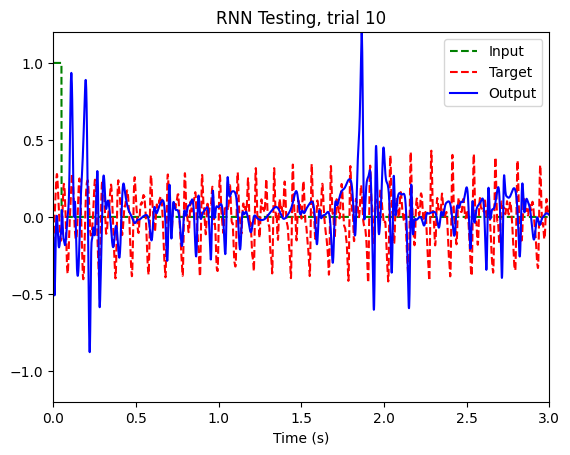

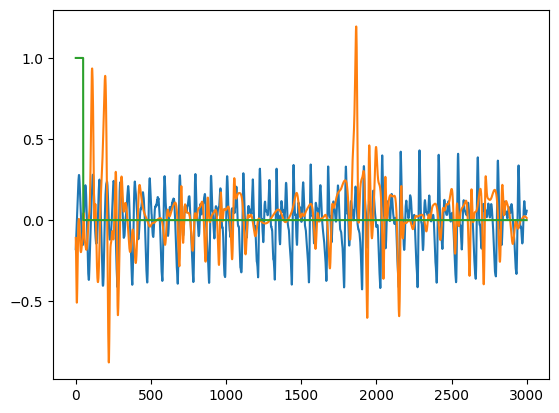

510
1
Initializing...
Training network...
Batch 1 of 10, 50 trials: 
..................................................
Batch 2 of 10, 50 trials: 
...............

In [ ]:
import pickle
import os

#With line_profiler:
# %lprun -f rnn.train rnn.train(fullforce_oscillation_test, monitor_training=1)

system_change_test(dt=0.001,showplots=1);
with open(os.path.join("model", "rnnrv25001.pkl"), "rb") as file:
     rnn1 = pickle.load(file)



enorm1,output1,target1= rnn1.test(system_change_test)
np.savetxt('outputs5001systemchange.csv',output1)
np.savetxt('targets5001systemchange.csv',target1)
if enorm1>0.3:
   errors, rnn2, enorm1,output1 = YYO(510, 550)
   enorm1 = rnn2.test(system_change_test)
# print('enorm3',enorm3)
#print('enorm1',enorm1)

In [15]:
enorm0


NameError: ignored